# Dense Network

### Load data

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import os
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sklearn as skl

os.environ["CUDA_VISIBLE_DEVICES"]= "-1" # Force Tensorflow on CPU instead of GPU (seems to avoid an error with my CUDA compatible GPU)

C:\Users\lyeso\anaconda3\envs\exts-ml\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load training data form NPZ file

train_data = "train.npz"
X_tr = np.load(train_data)["features"]
y_tr = np.load(train_data)["labels"]
images_tr = np.load(train_data)["pixels"]
names_tr = np.load(train_data)["names"]

valid_data = "valid.npz"
X_val= np.load(valid_data)["features"]
y_val = np.load(valid_data)["labels"]
images_val = np.load(valid_data)["pixels"]
names_val = np.load(valid_data)["names"]

test_data = "test.npz"
X_te= np.load(test_data)["features"]
y_te = np.load(test_data)["labels"]
images_te = np.load(test_data)["pixels"]
names_te = np.load(test_data)["names"]

# Create a dictionnary for labels
labels_dict = {0: 'bike', 1 : 'car', 2: 'motorcycle', 3: 'other', 4:'truck', 5: 'van'}

In [3]:
### Let's use a bigger dataset for training.

X = np.concatenate((X_tr,X_val), axis=0, out=None)  # X for Cross Validation and Grid Search
y = np.concatenate((y_tr,y_val), axis=0, out=None) 

In [4]:
# Rescale train and validation data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_te_scaled = scaler.transform(X_te)

### 1 layer dense network

In [5]:
# Import Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()
model.add(Dense(6, activation='softmax', input_dim=2048))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12294     
Total params: 12,294
Trainable params: 12,294
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [7]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [8]:
# Fit model
dense = model.fit(
    x=X, y=y,
    validation_split=0.2, batch_size=32, epochs=20,
    shuffle=True # Shuffle training samples
)

Train on 335 samples, validate on 84 samples
Epoch 1/20
335/335 [==============================] - 0s 526us/step - loss: 1.6056 - acc: 0.3313 - val_loss: 1.4886 - val_acc: 0.4167
Epoch 2/20
335/335 [==============================] - 0s 38us/step - loss: 0.9689 - acc: 0.7642 - val_loss: 1.1776 - val_acc: 0.6071
Epoch 3/20
335/335 [==============================] - 0s 56us/step - loss: 0.7234 - acc: 0.8179 - val_loss: 0.9305 - val_acc: 0.7024
Epoch 4/20
335/335 [==============================] - 0s 43us/step - loss: 0.5872 - acc: 0.8507 - val_loss: 0.8175 - val_acc: 0.7500
Epoch 5/20
335/335 [==============================] - 0s 60us/step - loss: 0.5013 - acc: 0.9045 - val_loss: 0.7441 - val_acc: 0.7619
Epoch 6/20
335/335 [==============================] - 0s 37us/step - loss: 0.4429 - acc: 0.9164 - val_loss: 0.7083 - val_acc: 0.7738
Epoch 7/20
335/335 [==============================] - 0s 58us/step - loss: 0.3991 - acc: 0.9254 - val_loss: 0.6411 - val_acc: 0.7976
Epoch 8/20
335/335 [===

### Let's plot the accuracy curve

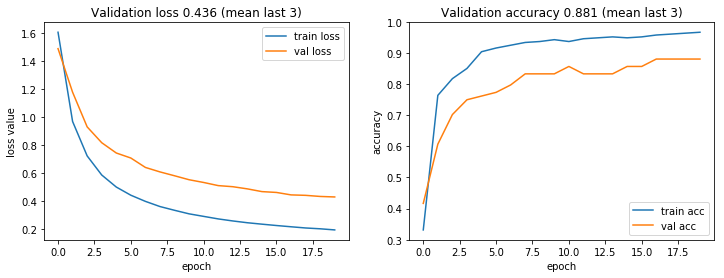

In [9]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(dense.history['loss'], label='train loss')
ax1.plot(dense.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(dense.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(dense.history['acc'], label='train acc')
ax2.plot(dense.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(dense.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [10]:
(test_loss, test_accuracy) = model.evaluate(X_te, y_te, batch_size=32)

dense_best = test_accuracy

print('Test loss: {:.2f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) 

50/50 [==============================] - 0s 140us/step
Test loss: 0.25
Test accuracy: 94.00%


### Seems to work better when not "standard-scaled"

### Dense and hidden layer

In [11]:
from tensorflow.keras import activations
from tensorflow.keras import initializers

In [12]:
# Create model
model2 = Sequential()

# Hidden layer
model2.add(Dense(
    units=100, activation=activations.relu, input_dim=2048))

# Output layer
model2.add(Dense(
    units=6, activation=activations.softmax))

# Print network summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               204900    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 606       
Total params: 205,506
Trainable params: 205,506
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Define loss function, optimizer, and metrics to track during training
model2.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

In [14]:
# Fit model
dense2 = model2.fit(
    x=X, y=y,
    validation_split=0.2, batch_size=32, epochs=50,
    shuffle=True # Shuffle training samples
)

Train on 335 samples, validate on 84 samples
Epoch 1/50
335/335 [==============================] - 0s 561us/step - loss: 1.4470 - acc: 0.4507 - val_loss: 1.4942 - val_acc: 0.4524
Epoch 2/50
335/335 [==============================] - 0s 70us/step - loss: 0.9794 - acc: 0.7701 - val_loss: 1.2007 - val_acc: 0.6310
Epoch 3/50
335/335 [==============================] - 0s 70us/step - loss: 0.7380 - acc: 0.8299 - val_loss: 0.9801 - val_acc: 0.7381
Epoch 4/50
335/335 [==============================] - 0s 74us/step - loss: 0.6004 - acc: 0.8597 - val_loss: 0.8331 - val_acc: 0.7738
Epoch 5/50
335/335 [==============================] - 0s 62us/step - loss: 0.5105 - acc: 0.8806 - val_loss: 0.7695 - val_acc: 0.8095
Epoch 6/50
335/335 [==============================] - 0s 67us/step - loss: 0.4438 - acc: 0.8866 - val_loss: 0.6953 - val_acc: 0.8333
Epoch 7/50
335/335 [==============================] - 0s 70us/step - loss: 0.3963 - acc: 0.9194 - val_loss: 0.6455 - val_acc: 0.8214
Epoch 8/50
335/335 [===

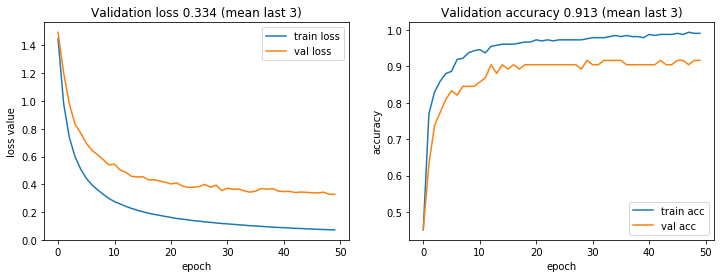

In [15]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(dense2.history['loss'], label='train loss')
ax1.plot(dense2.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(dense2.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(dense2.history['acc'], label='train acc')
ax2.plot(dense2.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(dense2.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [16]:
(test_loss, test_accuracy) = model2.evaluate(X_te, y_te, batch_size=32)

two_dense_best = test_accuracy

print('Test loss: {:.2f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) 

50/50 [==============================] - 0s 96us/step
Test loss: 0.19
Test accuracy: 92.00%


# Save results

In [17]:
import csv

# Random Forest results

data = ['1-layer nn',dense_best]


with open('Results.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    writer.writerow(data)
    
    

# Linear SVM results  

data = ['2-layer nn', two_dense_best]


with open('Results.csv', 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    writer.writerow(data)